### Bài 1:

## Cài đặt các thư viện cần thiết

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size':18})

In [ ]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

## Đọc dữ liệu

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
730,female,group B,associate's degree,free/reduced,completed,68,77,80
178,female,group B,master's degree,free/reduced,completed,52,70,62
101,male,group D,bachelor's degree,standard,completed,68,74,74
408,female,group D,high school,free/reduced,completed,52,57,56
426,male,group C,bachelor's degree,standard,none,86,83,86
764,male,group D,some college,standard,none,60,63,59
981,male,group D,some high school,standard,none,81,78,78
243,male,group E,some college,standard,none,59,51,43
651,female,group A,high school,standard,completed,68,80,76
964,male,group D,some college,standard,none,72,57,58


## So sánh biến Gender với Math score

**Phát biểu giả thuyết**

$H_{0}$: Giới tính và điểm môn toán không phụ thuộc nhau

$H_{1}$: Giới tính và điểm môn toán có mối liên hệ với nhau

In [ ]:
bins = [0, 60, 75, 85, 100]
gen_math_df = df[['gender', 'math score']].copy()
gen_math_df['ThangDiem'] = pd.cut(gen_math_df['math score'], bins, labels=['D','C','B','A'])
gen_math_df.sample(10)

,gender,math score,ThangDiem
595,female,56,D
820,female,85,B
414,female,51,D
922,male,72,C
239,male,84,B
812,female,54,D
542,female,81,B
480,male,73,C
268,female,88,A
432,male,61,C


In [ ]:
tan_so_df = pd.crosstab(index = gen_math_df['gender'], columns=gen_math_df['ThangDiem'])
tan_so_df

ThangDiem,D,C,B,A
gender,,,,
female,204,201,75,37
male,134,186,96,66


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_df)

In [ ]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,24.626434,0.000018,3,Chấp nhận H1 với mức ý nghĩa 0.05


**Về mặt thống kê, giới tính có ảnh hưởng đến điểm môn toán với mức ý nghĩa 5%**

## Kỹ thuật EDA

In [ ]:
female = gen_math_df[gen_math_df['gender']=='female']
male = gen_math_df[gen_math_df['gender']=='male']

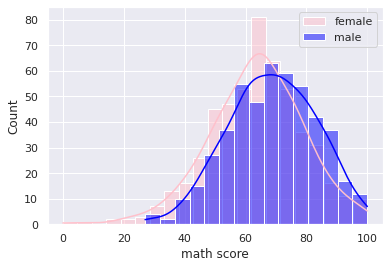

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = female, x='math score', color = 'pink', label = 'female', kde = True)
sns.histplot(data = male, x='math score', color='blue', label = 'male', kde=True)
plt.legend()
plt.show()

## Nghiên cứu biến Gender với Reading score

**Phát biểu giả thuyết**

$H_{0}$: Giới tính và điểm đọc không phụ thuộc nhau

$H_{1}$: Giới tính và điểm đọc có mối liên hệ với nhau

In [ ]:
bins = [0, 60, 75, 85, 100]
gen_read_df = df[['gender', 'reading score']].copy()
gen_read_df['ThangDiem'] = pd.cut(gen_read_df['reading score'], bins, labels=['D','C','B','A'])
gen_read_df.sample(10)

,gender,reading score,ThangDiem
102,female,91,A
237,female,60,D
640,male,52,D
263,female,93,A
442,female,73,C
871,female,72,C
293,female,73,C
935,male,63,C
673,female,84,B
46,female,65,C


In [ ]:
tan_so_df = pd.crosstab(index = gen_read_df['gender'], columns=gen_read_df['ThangDiem'])
tan_so_df

ThangDiem,D,C,B,A
gender,,,,
female,98,195,123,102
male,177,186,89,30


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_df)

In [ ]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,66.422785,2.488690e-14,3,Chấp nhận H1 với mức ý nghĩa 0.05


**Về mặt thống kê, giới tính có ảnh hưởng đến điểm đọc với mức ý nghĩa 5%**

## Kỹ thuật EDA

In [ ]:
female = gen_read_df[gen_read_df['gender']=='female']
male = gen_read_df[gen_read_df['gender']=='male']

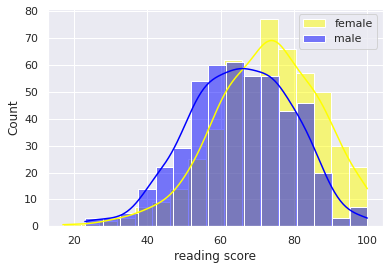

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = female, x='reading score', color = 'yellow', label = 'female', kde = True)
sns.histplot(data = male, x='reading score', color='blue', label = 'male', kde=True)
plt.legend()
plt.show()

## Nghiên cứu biến Gender với Writing score

**Phát biểu giả thuyết**

$H_{0}$: Giới tính và điểm viết không phụ thuộc nhau

$H_{1}$: Giới tính và điểm viết có mối liên hệ với nhau

In [ ]:
bins = [0, 60, 75, 85, 100]
gen_write_df = df[['gender', 'writing score']].copy()
gen_write_df['ThangDiem'] = pd.cut(gen_write_df['writing score'], bins, labels=['D','C','B','A'])
gen_write_df.sample(10)

,gender,writing score,ThangDiem
698,female,79,B
386,female,70,C
269,female,70,C
550,male,65,C
377,female,100,A
385,female,75,C
796,male,70,C
433,female,50,D
568,male,47,D
758,female,65,C


In [ ]:
tan_so_df = pd.crosstab(index = gen_write_df['gender'], columns=gen_write_df['ThangDiem'])
tan_so_df

ThangDiem,D,C,B,A
gender,,,,
female,100,187,137,94
male,201,184,70,27


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_df)

In [ ]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,91.522401,1.031660e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


**Về mặt thống kê, giới tính có ảnh hưởng đến điểm viết với mức ý nghĩa 5%**

## Kỹ thuật EDA

In [ ]:
female = gen_write_df[gen_write_df['gender']=='female']
male = gen_write_df[gen_write_df['gender']=='male']

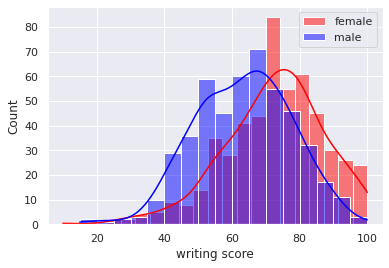

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = female, x='writing score', color = 'red', label = 'female', kde = True)
sns.histplot(data = male, x='writing score', color='blue', label = 'male', kde=True)
plt.legend()
plt.show()

## Nghiên cứu ảnh hưởng của Lunch đến Math score

**Phát biểu giả thuyết**

$H_{0}$: Ăn trưa và điểm toán không phụ thuộc nhau

$H_{1}$: Ăn trưa và điểm toán có mối liên hệ với nhau

In [ ]:
bins = [0, 60, 75, 85, 100]
lun_math_df = df[['lunch', 'math score']].copy()
lun_math_df['ThangDiem'] = pd.cut(lun_math_df['math score'], bins, labels=['D','C','B','A'])
lun_math_df.sample(10)

,lunch,math score,ThangDiem
475,standard,71,C
972,free/reduced,53,D
729,standard,53,D
367,free/reduced,61,C
75,free/reduced,44,D
775,free/reduced,49,D
609,standard,58,D
255,standard,62,C
375,free/reduced,46,D
565,standard,48,D


In [ ]:
tan_so_df = pd.crosstab(index = lun_math_df['lunch'], columns=lun_math_df['ThangDiem'])
tan_so_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,181,124,37,12
standard,157,263,134,91


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_df)

In [ ]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,90.126341,2.057882e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


**Về mặt thống kê, ăn trưa có ảnh hưởng đến điểm môn toán với mức ý nghĩa 5%**

## Kỹ thuật EDA

In [ ]:
standard = lun_math_df[lun_math_df['lunch']=='standard']
free_or_reduced = lun_math_df[lun_math_df['lunch']=='free/reduced']

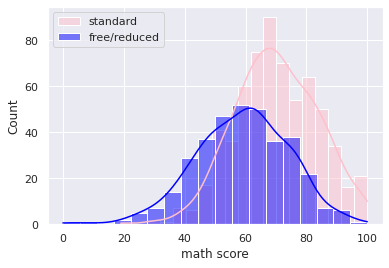

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = standard, x='math score', color = 'pink', label = 'standard', kde = True)
sns.histplot(data = free_or_reduced, x='math score', color='blue', label = 'free/reduced', kde=True)
plt.legend()
plt.show()

## Nghiên cứu ảnh hưởng của Lunch đến Reading score

**Phát biểu giả thuyết**

$H_{0}$: Ăn trưa và điểm đọc không phụ thuộc nhau

$H_{1}$: Ăn trưa và điểm đọc có mối liên hệ với nhau

In [ ]:
bins = [0, 60, 75, 85, 100]
lun_read_df = df[['lunch', 'reading score']].copy()
lun_read_df['ThangDiem'] = pd.cut(lun_read_df['reading score'], bins, labels=['D','C','B','A'])
lun_read_df.sample(10)

,lunch,reading score,ThangDiem
592,standard,68,C
903,free/reduced,100,A
689,free/reduced,90,A
147,free/reduced,68,C
909,standard,64,C
106,standard,100,A
338,free/reduced,38,D
38,free/reduced,90,A
361,standard,84,B
925,standard,64,C


In [ ]:
tan_so_df = pd.crosstab(index = lun_read_df['lunch'], columns=lun_read_df['ThangDiem'])
tan_so_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,139,130,56,30
standard,136,251,156,102


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_df)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,44.549719,1.153330e-09,3,Chấp nhận H1 với mức ý nghĩa 0.05


**Về mặt thống kê, ăn trưa có ảnh hưởng đến điểm đọc với mức ý nghĩa 5%**

## Kỹ thuật EDA

In [ ]:
standard = lun_read_df[lun_read_df['lunch']=='standard']
free_or_reduced = lun_read_df[lun_read_df['lunch']=='free/reduced']

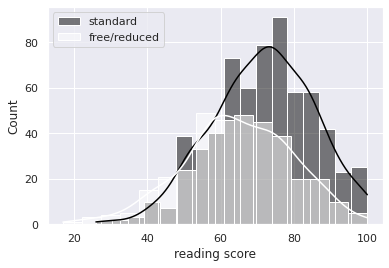

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = standard, x='reading score', color = 'black', label = 'standard', kde = True)
sns.histplot(data = free_or_reduced, x='reading score', color='white', label = 'free/reduced', kde=True)
plt.legend()
plt.show()

## Ảnh hưởng của Lunch đến Writing score

**Phát biểu giả thuyết**

$H_{0}$: Ăn trưa và điểm viết không phụ thuộc nhau

$H_{1}$: Ăn trưa và điểm viết có mối liên hệ với nhau

In [ ]:
bins = [0, 60, 75, 85, 100]
lun_write_df = df[['lunch', 'writing score']].copy()
lun_write_df['ThangDiem'] = pd.cut(lun_write_df['writing score'], bins, labels=['D','C','B','A'])
lun_write_df.sample(10)

,lunch,writing score,ThangDiem
600,standard,63,C
969,standard,80,B
467,free/reduced,65,C
781,standard,84,B
295,free/reduced,60,D
754,free/reduced,53,D
394,standard,77,B
3,free/reduced,44,D
601,standard,30,D
1,standard,88,A


In [ ]:
tan_so_df = pd.crosstab(index = lun_write_df['lunch'], columns=lun_write_df['ThangDiem'])
tan_so_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,156,120,56,23
standard,145,251,151,98


In [ ]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_df)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,57.47865,2.031098e-12,3,Chấp nhận H1 với mức ý nghĩa 0.05


**Về mặt thống kê, ăn trưa có ảnh hưởng đến điểm viết với mức ý nghĩa 5%**

## Kỹ thuật EDA

In [ ]:
standard = lun_write_df[lun_write_df['lunch']=='standard']
free_or_reduced = lun_write_df[lun_write_df['lunch']=='free/reduced']

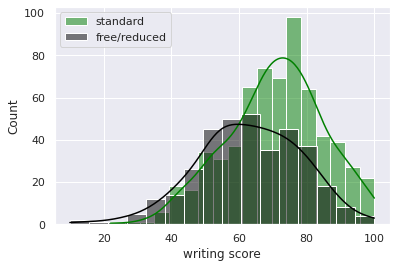

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = standard, x='writing score', color = 'green', label = 'standard', kde = True)
sns.histplot(data = free_or_reduced, x='writing score', color='black', label = 'free/reduced', kde=True)
plt.legend()
plt.show()

### Bài 2:

In [ ]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

## Đọc dữ liệu

In [ ]:
df = pd.io.stata.read_stata("https://www.stata-press.com/data/r17/cholesterol.dta")

In [ ]:
df.sample(10)

,race,agegrp,chol,agemidpt,meangrp
41,White,30–39,205.506882,35.0,201.394150
22,Black,20–29,187.652069,25.0,188.056671
39,White,30–39,196.421158,35.0,201.394150
43,Black,30–39,210.038010,35.0,201.394150
35,White,30–39,187.386658,35.0,201.394150
42,Other,30–39,185.618561,35.0,201.394150
32,Other,30–39,207.087860,35.0,201.394150
60,Other,60–79,236.831116,70.0,220.615295
14,Other,10–19,174.352081,15.0,179.853088
58,White,40–59,216.132538,50.0,210.003769


## So sánh trung bình Cholesterol giữa các nhóm sắc tộc

**Phát biểu giả thuyết:**

$H_{0}$: Không có sự khác biệt về trung bình cholesterol giữa 3 nhóm sắc tộc

$H_{1}$: Có ít nhất 2 nhóm sắc tộc có trung bình cholesterol khác nhau

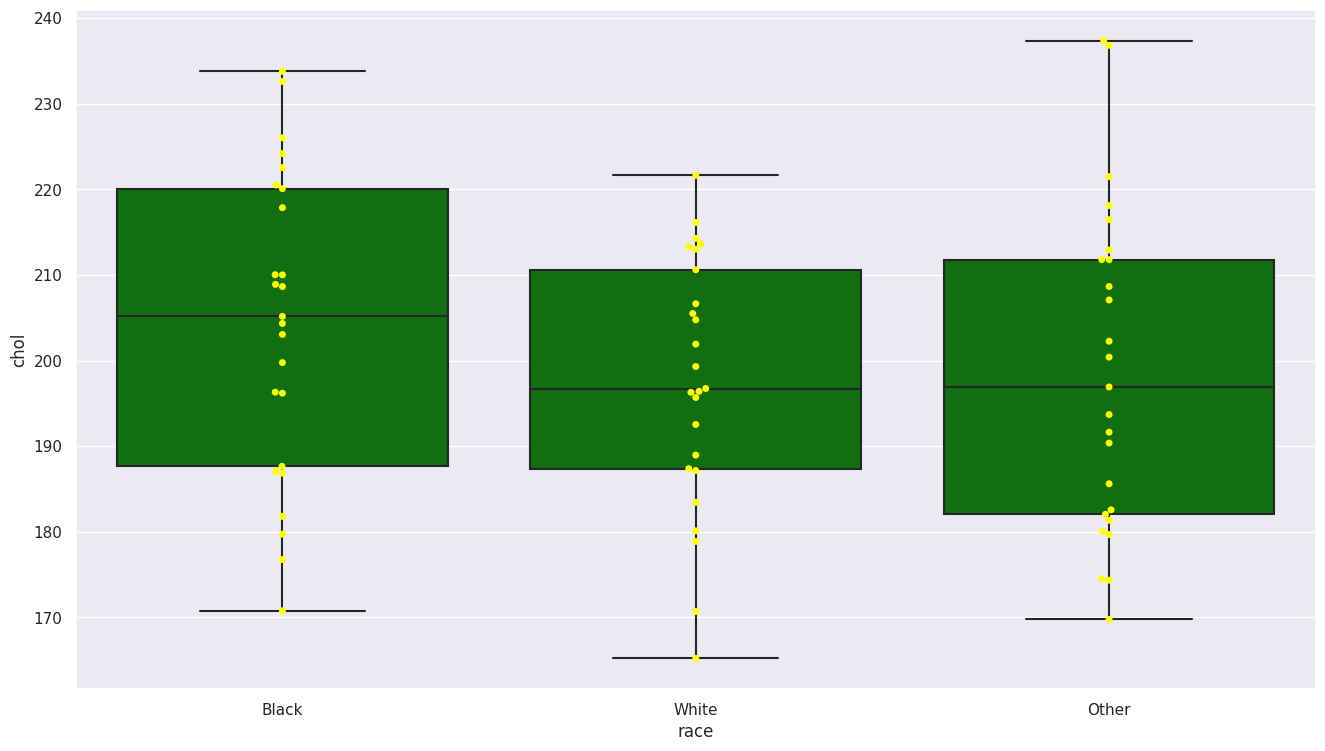

In [44]:
# Kỹ thuật EDA:
sns.boxplot(x='race', y='chol', data=df, color='green')
sns.swarmplot(x='race', y='chol', data=df, color='yellow')
plt.show()

In [45]:
race_chol_df = df[['race', 'chol']].copy()
white = race_chol_df[race_chol_df['race']=='White']
black = race_chol_df[race_chol_df['race']=='Black']
other = race_chol_df[race_chol_df['race']=='Other']

In [46]:
p = {}
p['f_score'], p['p_value'] = stats.f_oneway(white['chol'],black['chol'],other['chol'])
results(p)

,f_score,p_value,KetLuan
,1.108161,0.33573,Chấp nhận H0 với mức ý nghĩa 0.05


In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [49]:
tukey = pairwise_tukeyhsd(endog=df['chol'],
                          groups=df['race'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Black,Other,-5.7153,0.4808,-17.4778,6.0473,False
Black,White,-6.8147,0.3542,-18.5773,4.9478,False
Other,White,-1.0995,0.9,-12.862,10.6631,False


In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [51]:
model = ols('chol ~ C(race)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [52]:
anova_table

,sum_sq,df,F,PR(>F)
C(race),669.278235,2.0,1.108161,0.33573
Residual,21742.341205,72.0,NaN,NaN
